# Logistic Regression Classifier from scratch Python

Logistic Regression is a linear model for Classification rather than Regression. It is basically a binary classifier which uses 'One-Vs-Rest' approach in multiclass classification task. In opposite to Linear Regression, which predict/forecast the continuous values, Logistic Regression is a very simple and rudimental algorithm for classification purpose.

Like Linear Regression, Logistic Regression also uses a linear equation to predict values which is presented below:

\begin{align}
z = \theta_0 + \theta_1*x_1 + \theta_2*x_2 + \theta_3*x_3 + .....
\end{align}

 This predicted value can be anywhere between positive and negative infinity. Since we want the result in 0 or 1 in classification task, therefore predicted value between positive and negative inifinty is coverted between 0 and 1. Sigmoid Function is used for this purpose which is presented below.

\begin{align}
h = g(z) = \frac{1}{1+e^{-z}}
\end{align}

The output value of Linear Equation is fed to Sigmoid function g(z) which squashes the result between 0 and 1.

The Cost/Loss Function to calculate the cost for misclassification is presented below:
\begin{align}
J(\theta) = - 1/m * \sum_{i=1}^m[y^ilog(h_\theta(x^i))+(1-y^i)log(1-h_\theta(x^i))]
\end{align}

Vectorized Implementation of the above Equation is as follow.

\begin{align}
J(\theta) = 1/m . (-y^Tlog(h) - (1-y)^Tlog(1-h))
\end{align}

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Load Dataset from drive

In [2]:
df = pd.read_csv(r'E:\Masters\01-Study\Master Thesis\1-Working\3rd Task (Laptop C implementation)\2-Logistic_Regression_scratch_Python\Tutorial-3 (working)\Iris.csv') ## Load data

A preview of dataset is presented below:

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


'Id' column of Dataset is being dropped because it is not needed.

In [4]:
df = df.drop(['Id'],axis=1)

Dataset contains three types of flowers. First 50 samples belong to 'Iris-Setosa', next 50 samples belong to 'Iris-Versicolor' whereas last 50 samples belong to 'Iris-Virginica' class. Since this example deals only with Binary Classification so there should be only two types of flowers to be classified. Therefore last 50 samples of dataset have been dropped. 

In [5]:
rows = list(range(100,150))
df = df.drop(df.index[rows])  ## Drop the rows with target values Iris-virginica

Now labels of the flower will be made. If the flower is of type 'Iris-Setosa' then they are represented by 0. Otherwise, if they are of type 'Iris-Versicolor' they they are represented by 1.

In [6]:
Y = []
target = df['Species']

In [7]:
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(0)
    else:
        Y.append(1)

Now the 'Species' column of dataset is being dropped because it is no longer needed. 

In [8]:
df = df.drop(['Species'],axis=1)

In [9]:
X = df.values.tolist()

Dataset is shuffled so that 'Iris-Setosa' and 'Iris-Versicolor' samples get mix and then they can be used for training and testing.

In [10]:
X, Y = shuffle(X,Y)

90% of the data will be used for training whereas rest of 10% will be used for testing purpose.

In [11]:
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

There are four features in dataset i.e. Sepal Length, Sepal Width, Petal Length, Petal Width. These features have been separated and stored in variables x_1, x_2, x_3 and x_4 respectively.

In [12]:
x_1 = x_train[:,0]
x_2 = x_train[:,1]
x_3 = x_train[:,2]
x_4 = x_train[:,3]

x_1 = np.array(x_1)
x_2 = np.array(x_2)
x_3 = np.array(x_3)
x_4 = np.array(x_4)

print(x_1.shape)
print(x_2.shape)
print(x_3.shape)
print(x_4.shape)

(90,)
(90,)
(90,)
(90,)


In [13]:
x_1 = x_1.reshape(90,1)
x_2 = x_2.reshape(90,1)
x_3 = x_3.reshape(90,1)
x_4 = x_4.reshape(90,1)

print(x_1.shape)
print(x_2.shape)
print(x_3.shape)
print(x_4.shape)

(90, 1)
(90, 1)
(90, 1)
(90, 1)


In [14]:
y_train = y_train.reshape(90,1)

Sigmoid Function is defined below, which will be used further.

In [15]:
def sigmoid(x):
    return (1 / (1 + np.exp(-x)))

Here 'm' is the number of samples whereas 'alpha' is Learning Rate.

In [16]:
m = 90
alpha = 0.0001

Parameter Values have been initialized with Zero.

In [17]:
theta_0 = np.zeros((m,1))
theta_1 = np.zeros((m,1))
theta_2 = np.zeros((m,1))
theta_3 = np.zeros((m,1))
theta_4 = np.zeros((m,1))

In [18]:
epochs = 0
cost_func = []

Program is run for 10000 Epochs. Each time, value of 'z' is calculated from linear equation and passed to Sigmoid function which gives the value 'h'. This value of 'h' is used further to calculate 'cost'. After that values of 'theta_0', 'theta_1', 'theta_2', 'theta_3' and 'theta_4' are updated and value of 'cost' is pushed into an array. The loop runs again and conitnues for 10000 Epochs.

In [19]:
while(epochs < 10000):
    z = theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4
    h = sigmoid(z)
    
    cost = (- np.dot(np.transpose(y_train),np.log(h)) - np.dot(np.transpose(1-y_train),np.log(1-h)))/m
    
    theta_0_grad = np.dot(np.ones((1,m)),h-y_train)/m
    theta_1_grad = np.dot(np.transpose(x_1),h-y_train)/m
    theta_2_grad = np.dot(np.transpose(x_2),h-y_train)/m
    theta_3_grad = np.dot(np.transpose(x_3),h-y_train)/m
    theta_4_grad = np.dot(np.transpose(x_4),h-y_train)/m
    
    theta_0 = theta_0 - alpha * theta_0_grad
    theta_1 = theta_1 - alpha * theta_1_grad
    theta_2 = theta_2 - alpha * theta_2_grad
    theta_3 = theta_3 - alpha * theta_3_grad
    theta_4 = theta_4 - alpha * theta_4_grad
    
    cost_func.append(cost)
    epochs += 1

Now the Training Part is complete. Trained parameters have been stored in theta_0, theta_1, theta_2, theta_3 and theta_4. These parameters will be used further during Testing.

Four features are separated from Test Dataset and pre-processed before Testing.

In [20]:
test_x_1 = x_test[:,0]
test_x_2 = x_test[:,1]
test_x_3 = x_test[:,2]
test_x_4 = x_test[:,3]

test_x_1 = np.array(test_x_1)
test_x_2 = np.array(test_x_2)
test_x_3 = np.array(test_x_3)
test_x_4 = np.array(test_x_4)

test_x_1 = test_x_1.reshape(10,1)
test_x_2 = test_x_2.reshape(10,1)
test_x_3 = test_x_3.reshape(10,1)
test_x_4 = test_x_4.reshape(10,1)

In [21]:
theta_0.shape

(90, 1)

In [22]:
theta_0

array([[-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0.04552131],
       [-0

Only first 10 values of theta_0, theta_1, theta_2, theta_3 and theta_4 have been kept and rest are discarded because Test dataset contains only 10 samples.

In [23]:
index = list(range(10,90))

theta_0 = np.delete(theta_0, index)
theta_1 = np.delete(theta_1, index)
theta_2 = np.delete(theta_2, index)
theta_3 = np.delete(theta_3, index)
theta_4 = np.delete(theta_4, index)

theta_0 = theta_0.reshape(10,1)
theta_1 = theta_1.reshape(10,1)
theta_2 = theta_2.reshape(10,1)
theta_3 = theta_3.reshape(10,1)
theta_4 = theta_4.reshape(10,1)

Now the values are predicted.

In [24]:
y_pred = theta_0 + theta_1 * test_x_1 + theta_2 * test_x_2 + theta_3 * test_x_3 + theta_4 * test_x_4
y_pred = sigmoid(y_pred)

Classify as 1 if probability is more that 0.5. Otherwise classify it as 0.

In [25]:
new_y_pred =[]
for val in y_pred:
    if(val >= 0.5):
        new_y_pred.append(1)
    else:
        new_y_pred.append(0)

In [26]:
print('Accuracy : ', accuracy_score(y_test,new_y_pred))

Accuracy :  1.0


As it can be seen that an Accuracy of 100% has been obtained. Since Dataset is very simple therefore getting an Accuracy of % is not surprising at all.

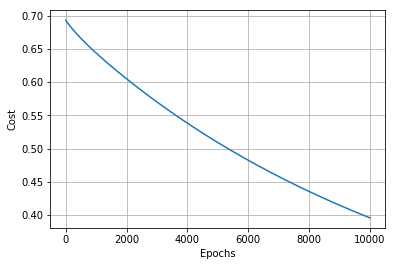

In [27]:
cost_func = np.array(cost_func)
cost_func = cost_func.reshape(10000,1)
plt.plot(range(len(cost_func)),cost_func)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.grid()

Now tha same process will be done using Scikit-Learn Library which provides a function for Logistic Regression Classifier.

# Logistic Regression Classifier from Scikit Learn

##### Importing Libraries

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

##### Defining Classifier

In [29]:
clf = LogisticRegression()

##### Training

In [30]:
clf.fit(x_train, y_train)

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

##### Testing

In [31]:
y_pred = clf.predict(x_test)

In [32]:
print('Accuracy : ', accuracy_score(y_test,y_pred))

Accuracy :  1.0


Again 100% Accuracy has obtained. Getting same accuracy using both methods provides a proof of correctness of scratch Python implementation.